In [27]:
##zero intialization
##tanh and relu same function

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/ushape.csv')

In [8]:
df.head()

,x,y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046200,1.0
2,0.882490,-0.075800,0.0
3,-0.055100,-0.037300,1.0
4,0.829545,-0.539000,1.0


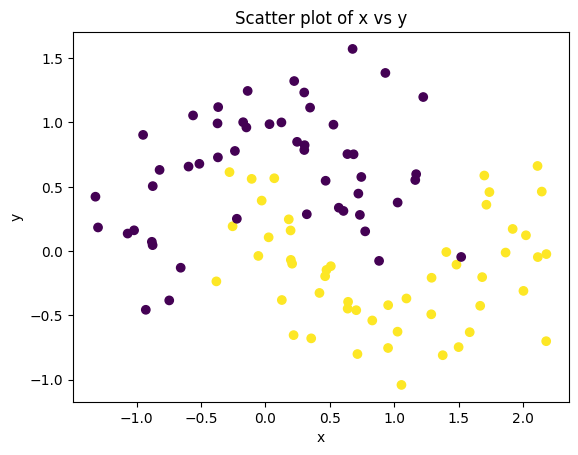

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'], c=df['class'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.show()


In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Set parameters to 0
model.get_weights()

[array([[ 0.06978893,  0.25349456, -0.7037787 ,  0.42761737,  0.42716116,
          0.682589  , -0.55889386,  0.20933598, -0.1754927 ,  0.43286628],
        [-0.49925503,  0.22464675,  0.47689646, -0.19506067, -0.60941106,
          0.5196108 ,  0.5514465 ,  0.34522313,  0.39555186, -0.20238292]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.5097515 ],
        [ 0.26106852],
        [-0.26647022],
        [-0.27726206],
        [ 0.42217165],
        [-0.06042612],
        [ 0.40915257],
        [ 0.673605  ],
        [-0.6823745 ],
        [ 0.23546028]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
initial_weights = model.get_weights()

In [19]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [20]:
model.set_weights(initial_weights)

In [21]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.4477 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4688 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5430 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [24]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.00167155], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

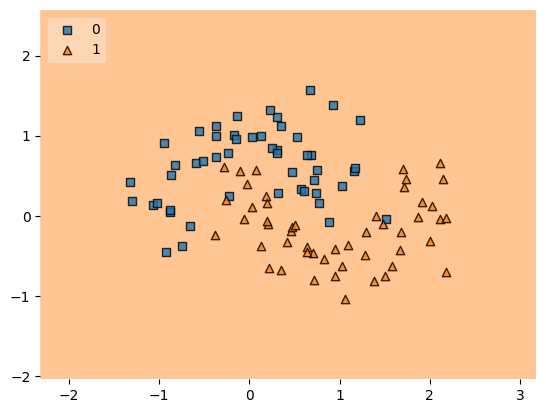

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [28]:
##sigmoid is different

In [34]:
models = Sequential()

models.add(Dense(10,activation='sigmoid',input_dim=2))
models.add(Dense(1,activation='sigmoid'))

models.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
initial_weightss = models.get_weights()

In [36]:
initial_weightss[0] = np.zeros(models.get_weights()[0].shape)
initial_weightss[1] = np.zeros(models.get_weights()[1].shape)
initial_weightss[2] = np.zeros(models.get_weights()[2].shape)
initial_weightss[3] = np.zeros(models.get_weights()[3].shape)

In [37]:
models.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
historys= models.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.4961 - loss: 0.6773 - val_accuracy: 0.5000 - val_loss: 0.6668
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5430 - loss: 0.6588 - val_accuracy: 0.5000 - val_loss: 0.6642
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5117 - loss: 0.6669 - val_accuracy: 0.5000 - val_loss: 0.6616
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5156 - loss: 0.6640 - val_accuracy: 0.5000 - val_loss: 0.6592
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5195 - loss: 0.6588 - val_accuracy: 0.5000 - val_loss: 0.6568
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5195 - loss: 0.6593 - val_accuracy: 0.5000 - val_loss: 0.6546
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5234 - loss: 0.6607 - val_accuracy: 0.5000 - val_loss: 0.6524
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4922 - loss: 0.6655 - val_accuracy: 0.5000 - val_loss

In [40]:
models.get_weights()

[array([[ 0.7965251 ,  0.8512304 , -0.86044645, -0.06076659,  0.8524924 ,
         -0.58655906,  0.29268345, -0.37135345,  0.4564935 ,  0.316682  ],
        [-0.52751505,  0.0059288 , -0.18124843,  0.96705335, -1.0070875 ,
          0.8741501 ,  0.21331555,  0.71557945,  0.04012638, -0.08729349]],
       dtype=float32),
 array([-0.02473786, -0.02759758, -0.01579056, -0.08332985, -0.03226832,
        -0.01701757, -0.0392407 ,  0.04344111,  0.04591256, -0.03159993],
       dtype=float32),
 array([[ 0.40185627],
        [ 0.10808238],
        [-0.12879564],
        [-0.5230315 ],
        [ 0.42863664],
        [-0.81569916],
        [-0.1738775 ],
        [-0.09628631],
        [ 0.6326977 ],
        [-0.14174438]], dtype=float32),
 array([0.05644999], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 996us/step


<Axes: >

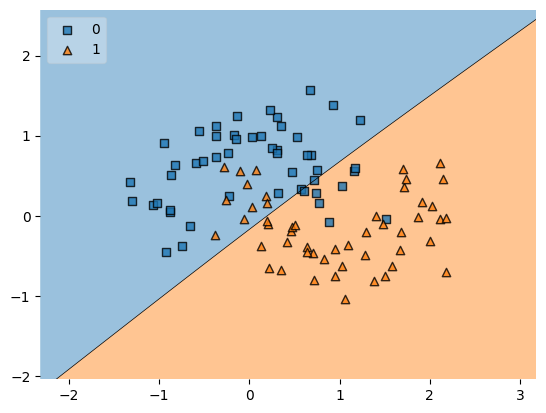

In [42]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=models, legend=2)

In [44]:
##non zeros constant value all w=0.5 and bias 0.5
##tanh,relu,sigmoid behave same

In [45]:
modelr = Sequential()

modelr.add(Dense(10,activation='tanh',input_dim=2))
modelr.add(Dense(1,activation='sigmoid'))

modelr.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
initial_weightsr = modelr.get_weights()

In [47]:
initial_weightsr[0] = np.zeros(modelr.get_weights()[0].shape)
initial_weightsr[1] = np.zeros(modelr.get_weights()[1].shape)
initial_weightsr[2] = np.zeros(modelr.get_weights()[2].shape)
initial_weightsr[3] = np.zeros(modelr.get_weights()[3].shape)

In [48]:
modelr.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
historyr= modelr.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.3633 - loss: 0.7173 - val_accuracy: 0.6000 - val_loss: 0.7004
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3852 - loss: 0.7132 - val_accuracy: 0.7000 - val_loss: 0.6930
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4719 - loss: 0.7037 - val_accuracy: 0.7000 - val_loss: 0.6856
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5164 - loss: 0.7005 - val_accuracy: 0.7000 - val_loss: 0.6784
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5508 - loss: 0.6985 - val_accuracy: 0.6500 - val_loss: 0.6714
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5273 - loss: 0.6933 - val_accuracy: 0.7000 - val_loss: 0.6644
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5547 - loss: 0.6858 - val_accuracy: 0.7000 - val_loss: 0.6575
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5609 - loss: 0.6821 - val_accuracy: 0.7000 - val_loss

In [51]:
modelr.get_weights()

[array([[-0.1151381 , -0.16439179, -0.73011345, -0.21122736, -0.73505974,
         -0.34012118, -0.17772748,  0.5242659 ,  0.3558463 ,  0.40364164],
        [ 0.82306665, -0.06034268, -0.07744198, -0.12170005, -0.03158119,
         -0.65050554,  0.28698963, -0.5483345 ,  0.2923329 ,  0.35949987]],
       dtype=float32),
 array([-0.04481963, -0.06606562,  0.06093838,  0.01776442,  0.07438813,
         0.04047622,  0.03787062, -0.12103178,  0.01311545,  0.0357088 ],
       dtype=float32),
 array([[-0.91452605],
        [ 0.5582713 ],
        [-0.63959736],
        [-0.10092632],
        [-0.49546006],
        [ 0.59232527],
        [-0.7837159 ],
        [ 0.34922275],
        [ 0.4677113 ],
        [-0.15584418]], dtype=float32),
 array([-0.0343544], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

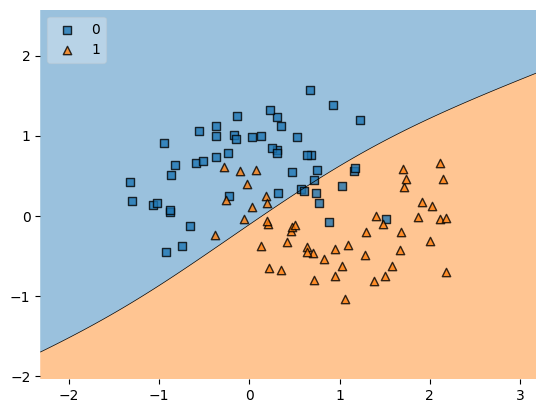

In [52]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=modelr, legend=2)

In [54]:
##random Intiallization
##small random values -sigmoid and tanh


In [60]:
modelso= Sequential()

modelso.add(Dense(2,activation='tanh',input_dim=2))
modelso.add(Dense(2,activation='tanh'))
modelso.add(Dense(2,activation='tanh'))
modelso.add(Dense(2,activation='tanh'))
modelso.add(Dense(1,activation='sigmoid'))

modelso.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
initial_weightso = modelso.get_weights()
initial_weightso[0] = np.zeros(modelso.get_weights()[0].shape)
initial_weightso[1] = np.zeros(modelso.get_weights()[1].shape)
initial_weightso[2] = np.zeros(modelso.get_weights()[2].shape)
initial_weightso[3] = np.zeros(modelso.get_weights()[3].shape)


modelso.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

historyso= modelso.fit(X,y,epochs=100,validation_split=0.2)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.8305 - loss: 0.6290 - val_accuracy: 0.8500 - val_loss: 0.5911
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8320 - loss: 0.6076 - val_accuracy: 0.8500 - val_loss: 0.5702
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7945 - loss: 0.5962 - val_accuracy: 0.8500 - val_loss: 0.5506
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8023 - loss: 0.5839 - val_accuracy: 0.8500 - val_loss: 0.5313
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8102 - loss: 0.5592 - val_accuracy: 0.8500 - val_loss: 0.5129
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7906 - loss: 0.5531 - val_accuracy: 0.8500 - val_loss: 0.4956
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8297 - loss: 0.5298 - val_accuracy: 0.8500 - val_loss: 0.4795
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8203 - loss: 0.5234 - val_accuracy: 0.8500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

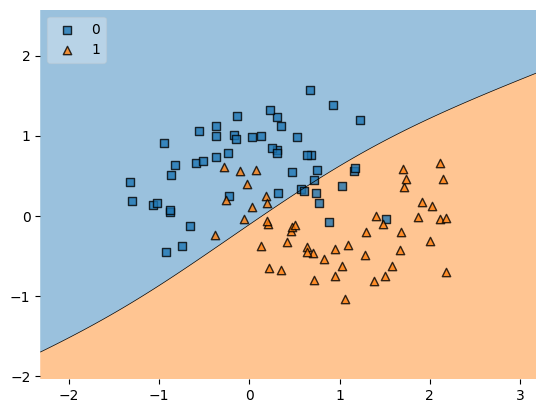

In [59]:
modelso.get_weights()
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=modelr, legend=2)

Data Generated: X shape = (100, 2) | y shape = (100, 1)

--- Model Summary ---


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)


--- Applying Custom Weight Initialization ---
Custom weights successfully set (Random Kernels, Zero Biases).

Model compiled successfully.

--- Starting Model Training ---
Model training complete.

Model weights after training: 10 tensors retrieved.


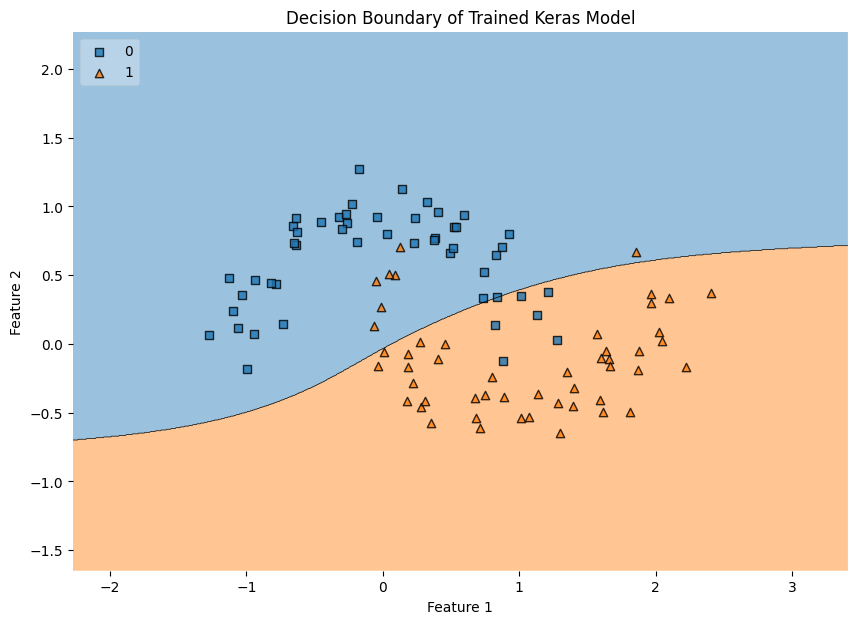

In [62]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

# Set a random seed for reproducibility in data generation
np.random.seed(42)
tf.random.set_seed(42)

# --- 0. Generate Synthetic Data (Required for .fit and plot_decision_regions) ---
# We create a non-linear dataset (moons) that requires a multi-layer network.
# X will be the 2-dimensional features, y will be the binary labels.
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
# y must be a column vector for Keras binary_crossentropy
y = y.reshape(-1, 1)

print("Data Generated: X shape =", X.shape, "| y shape =", y.shape)

# --- 1. MODEL DEFINITION ---
modelso = Sequential()

# Your model structure:
modelso.add(Dense(2, activation='tanh', input_dim=2))
modelso.add(Dense(2, activation='tanh'))
modelso.add(Dense(2, activation='tanh'))
modelso.add(Dense(2, activation='tanh'))
modelso.add(Dense(1, activation='sigmoid'))

print("\n--- Model Summary ---")
modelso.summary()

# --- 2. CUSTOM WEIGHT INITIALIZATION (Applying the random/zero pattern) ---

model_weights = modelso.get_weights()
initial_weights = []

print("\n--- Applying Custom Weight Initialization ---")

for i, weight_tensor in enumerate(model_weights):
    shape = weight_tensor.shape

    # Even indices (0, 2, 4, ...): Initialize with random values (Weights/Kernels)
    if i % 2 == 0:
        new_tensor = np.random.randn(*shape)
        init_type = "Random (randn)"

    # Odd indices (1, 3, 5, ...): Initialize with zeros (Biases)
    else:
        new_tensor = np.zeros(shape)
        init_type = "Zeros"

    initial_weights.append(new_tensor)
    # print(f"Index {i:2}: Shape {shape} | Initialized with {init_type}")

# Set the initialized weights back into the Keras model.
modelso.set_weights(initial_weights)
print("Custom weights successfully set (Random Kernels, Zero Biases).")


# --- 3. MODEL COMPILATION (Your Request) ---
modelso.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("\nModel compiled successfully.")

# --- 4. MODEL FITTING (Your Request) ---
print("\n--- Starting Model Training ---")
historyso = modelso.fit(
    X,
    y,
    epochs=100,
    validation_split=0.2, # Use 20% of data for validation
    verbose=0 # Set to 1 or 2 to see epoch progress
)
print("Model training complete.")

# --- 5. GET WEIGHTS (Your Request) ---
final_weights = modelso.get_weights()
print(f"\nModel weights after training: {len(final_weights)} tensors retrieved.")

# --- 6. PLOT DECISION REGIONS (Your Request) ---

# FIX: Create a wrapper class with a .predict() method to be compatible with mlxtend.
class KerasClassifier:
    """A wrapper class to make the Keras model compatible with mlxtend's plot_decision_regions."""
    def __init__(self, model):
        self.model = model

    def predict(self, X_test):
        # Predict probabilities (output of sigmoid)
        y_proba = self.model.predict(X_test, verbose=0)
        # Convert probabilities to binary class labels (0 or 1)
        y_class = (y_proba > 0.5).astype(int)
        # mlxtend requires a 1D array of classes, not a column vector
        return y_class.flatten()

# Instantiate the wrapper class
wrapped_clf = KerasClassifier(modelso)

# Note: I corrected 'modelr' to 'modelso' to match your definition.
plt.figure(figsize=(10, 7))
plot_decision_regions(
    X,
    y.astype('int').flatten(), # Flatten y to 1D integer array
    clf=wrapped_clf, # Pass the object with the .predict method
    legend=2,
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of Trained Keras Model")
plt.show()
